Fussy KMeans - A kind of soft KMeans

In [1]:
import mKMeans as mkm
import mKNN as mknn
import numpy as np
import matplotlib.pyplot as plt

load data, and def function.

In [2]:
HCM_data = np.array([[-3, 2],
                     [-3, -2],
                     [-3, 0],
                     [-2, 1],
                     [-2, 0],
                     [-2, -2],
                     [-1, 0],
                     [0, 0],
                     [1, 0],
                     [2, 1],
                     [2, 0],
                     [2, -1],
                     [3, 2],
                     [3, 0],
                     [3, -2]])

def draw(labels, centroids, title, data_2d):
    plt.figure()
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(title)
    plt.legend()
    plt.show()
    
def draw_soft_function(centroids, title, data_2d, probabilities):
    plt.figure()
    
    plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', edgecolors='black', s=100, marker='X', label='Centroids')

    plt.title('Soft KMeans Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    for i in range(probabilities.shape[1]):
        # 提取属于当前聚类的隶属度
        membership_probabilities = probabilities[:, i]
        # 为了可视化效果，我们可以取每个点对应聚类的隶属度作为颜色的透明度
        plt.scatter(data_2d[:, 0], data_2d[:, 1],
                    c=membership_probabilities, cmap='viridis', alpha=0.5)
    
    plt.colorbar(label='Membership Probability')
    # plt.legend()
    plt.show()


init and fit.

D:\Sustech\2024Spring\SDM359_Advanced_Machine_Learning\SDM359_Advanced_Machine_Learning\assignment\ass11\mKMeans.py:200: RuntimeWarning: divide by zero encountered in divide
  denominator = np.sum((numerator / distances) ** (2 / (self.beta - 1)))


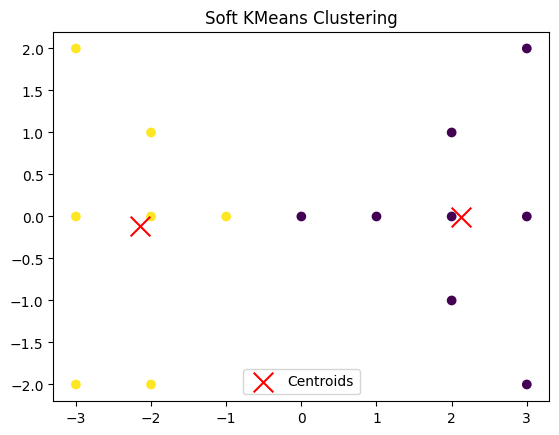

In [3]:
features = HCM_data
soft_kmeans = mkm.SoftKMeans(k=2,beta=2.0)  # beta参数控制soft assignment的程度
soft_kmeans.fit(features)

# 获取隶属度矩阵
probabilities = soft_kmeans.calculate_responsibilities(features)
# print(probabilities)
# draw the hard kmeans result.
draw(soft_kmeans.labels_, soft_kmeans.centroids, 'Soft KMeans Clustering', features)

visualize soft kmeans.

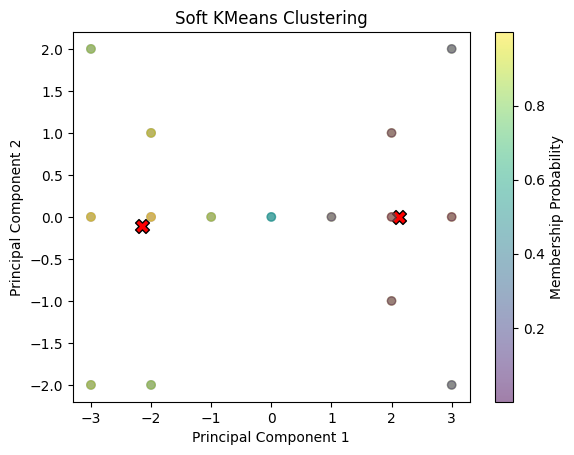

centers:  [[ 2.1273665  -0.00256924]
 [-2.15331816 -0.10754416]]


In [4]:
# 绘制渐变色的散点图
draw_soft_function(soft_kmeans.centroids, 'Soft KMeans Clustering', features, probabilities)
print('centers: ', soft_kmeans.centroids)

# For 8.2

In [5]:
center_82 = np.array([
    [-2,0],
    [2,0]
])
data_82 = np.array([
    [-2,1],
    [-2,-1],
    [0,0],
    [0,10],
    [2,1],
    [2,-1]
])
kmeans_82 = mkm.SoftKMeansForAss(k=2,beta=2.0, epochs=1)  # beta参数控制soft assignment的程度

Use fuzzy kmeans:

centroids are: [[-1.55256065  1.0916442 ]
 [ 1.55256065  1.0916442 ]]


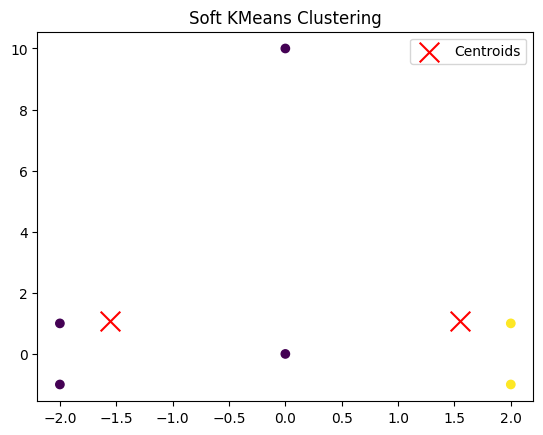

In [6]:
kmeans_82.fit_fuzzy(data_82, init_centroids=center_82.copy())
draw(kmeans_82.labels_, kmeans_82.centroids, 'Soft KMeans Clustering', data_82)

Use possibility kmeans:

centroids are: [[-1.80801801e+00  1.66042470e-03]
 [ 1.80801801e+00  1.66042470e-03]]


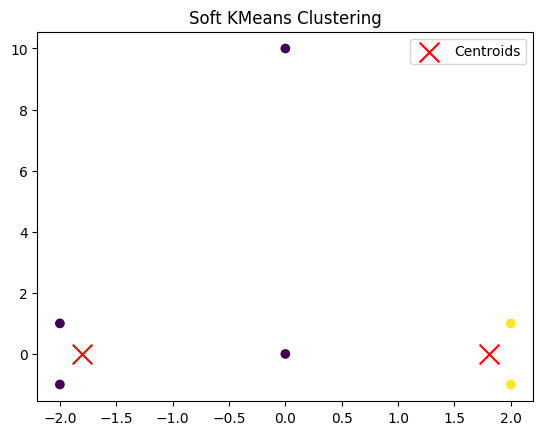

In [7]:
kmeans_82.fit_possibilities(data_82, init_centroids=center_82.copy())
draw(kmeans_82.labels_, kmeans_82.centroids, 'Soft KMeans Clustering', data_82)

# For 8.3
## a.

centers:  [[0.75 0.75]
 [4.25 4.25]]


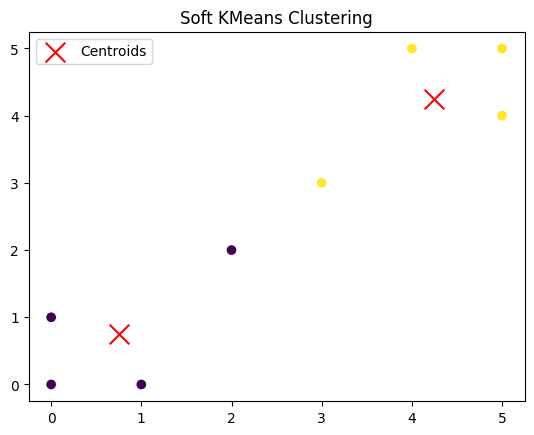

In [8]:
centers_83 = np.array([
    [0.5,0],
    [3.5,3.75]
])
kmeans_83a = mkm.SoftKMeansForAss(k=2,beta=2.0, epochs=50)  # beta参数控制soft assignment的程度
kmeans_83a = mkm.KMeansForAss(k=2)
data_83 = np.array([
    [0,0],
    [0,1],
    [5,4],
    [5,5],
    [4,5],
    [1,0],
    [2,2],
    [3,3]
])
# kmeans_88_2=kmeans_83a.fit_possibilities(data_83, init_centroids = centers_83)
kmeans_88_2=kmeans_83a.fit(data_83, init_centroids = centers_83)
print('centers: ', kmeans_83a.centroids)
draw(kmeans_83a.labels_, kmeans_83a.centroids, 'Soft KMeans Clustering', data_83)

## b

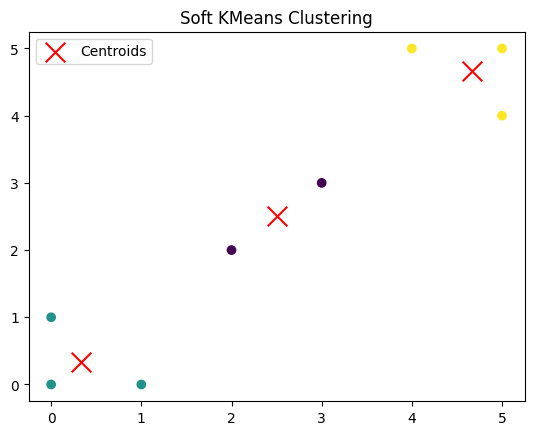

centers:  [[2.5        2.5       ]
 [0.33333333 0.33333333]
 [4.66666667 4.66666667]]


In [9]:
kmeans_83b = mkm.KMeansForAss(k=3)
centers_83b = np.concatenate((kmeans_83a.centroids.copy(), np.array([[5, 5]])), axis=0)
kmeans_88_3 = kmeans_83b.fit(data_83, init_centroids = centers_83)
draw(kmeans_83b.labels_, kmeans_83b.centroids, 'Soft KMeans Clustering', data_83)
print('centers: ', kmeans_83b.centroids)

Before we start 8-8, let's check the example given in the textbook.

In [10]:
course_points = np.array([
    [0.25,0.0],
    [0.0,0.5],
    [-0.5,0.0],
    [0.0,-0.5],
    [1.0,0],
    [0.0,-1.0]]
)
course_labels = np.array([0,0,0,1,1,1])
crisp_knn = mknn.CrispKNN(X=course_points, labels=course_labels)
print('crisp res: ', crisp_knn.knn(6, np.array([[0,0]])))

crisp res:  {0: 0.6666666666666666, 1: 0.3333333333333333}


In [11]:
softlabels = np.array([
    [0.625, 0.375],
    [0.625, 0.375],
    [0.625, 0.375],
    [0.0,1.0],
    [0.0,1.0],
    [0.0,1.0]
])
fuzzy_knn = mknn.FuzzyKNN(X = course_points, labels = course_labels, beta = 3, softlabels= softlabels)
print('fuzzy res: ', fuzzy_knn.knn(6, np.array([[0,0]])))

fuzzy res:  [0.41666667 0.58333333]


# 8.8
## a. 

In [17]:
y1 = np.array([[2.5,2]])
y2 = np.array([[0.5,0.5]])
labels_83 = kmeans_88_2.labels_.copy()
print('labels for 8-8:', labels_83)
print('centroids for it: ', kmeans_88_2.centroids)
responsibilities = mknn.calculate_responsibilities(X=data_83, centroids = kmeans_88_2.centroids, k=2, beta=2)
fuzzy_knn_88a = mknn.FuzzyKNN(data_83, labels_83, beta=2, softlabels=responsibilities)
#2NN:
print('2NN for y1: ', fuzzy_knn_88a.knn(k=2, y=y1))
print('2NN for y2: ', fuzzy_knn_88a.knn(k=2, y=y2))

#3NN:
print('3NN for y1: ', fuzzy_knn_88a.knn(k=3,y=y1))
print('3NN for y2: ', fuzzy_knn_88a.knn(k=3, y=y2))

labels for 8-8: [0 0 1 1 1 0 0 1]
centroids for it:  [[0.75 0.75]
 [4.25 4.25]]
2NN for y1:  [0. 0.]
2NN for y2:  [0.97421557 0.01510067]
3NN for y1:  [0. 0.]
3NN for y2:  [0.64947705 0.01006711]


## b.

In [14]:
labels_88b = np.array([0,0,1,1,1,0,1,1])
soft_labels_88b = np.array([
    [0.8,0.2],
    [0.6,0.4],
    [0.0,1.0],
    [0.0,1.0],
    [0.0,1.0],
    [0.6,0.4],
    [0.0,1.0],
    [0.0,1.0]
])
y_88b=np.array([[2.5,2.5]])
crisp_knn_88b = mknn.CrispKNN(data_83, labels_83)
fuzzy_knn_88b = mknn.FuzzyKNN(X = data_83, labels = labels_88b, beta=2, softlabels=soft_labels_88b)
print('crisp responsibilities: ', crisp_knn_88b.knn(5,y_88b))
print('fuzzy responsibilities: ', fuzzy_knn_88b.knn(5, y_88b))

crisp responsibilities:  {0: 0.4555405826166498, 1: 0.5444594173833501}
fuzzy responsibilities:  [0.01621622 0.98378378]
